<a href="https://colab.research.google.com/github/zainaae/CODSOFT/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries and Read data

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('/content/advertising.csv')
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


Step 2: Data Preprocessing

In [29]:
# Assuming there are no missing values and all columns are numeric.

# Feature Engineering (Optional)
data['AudienceSegment'] = np.random.choice(['SegmentA', 'SegmentB', 'SegmentC'], len(data))

# Encode categorical variables if needed (e.g., AudienceSegment)
encoder = LabelEncoder()
data['AudienceSegment'] = encoder.fit_transform(data['AudienceSegment'])


Step 3: Exploratory Data Analaysis(EDA)

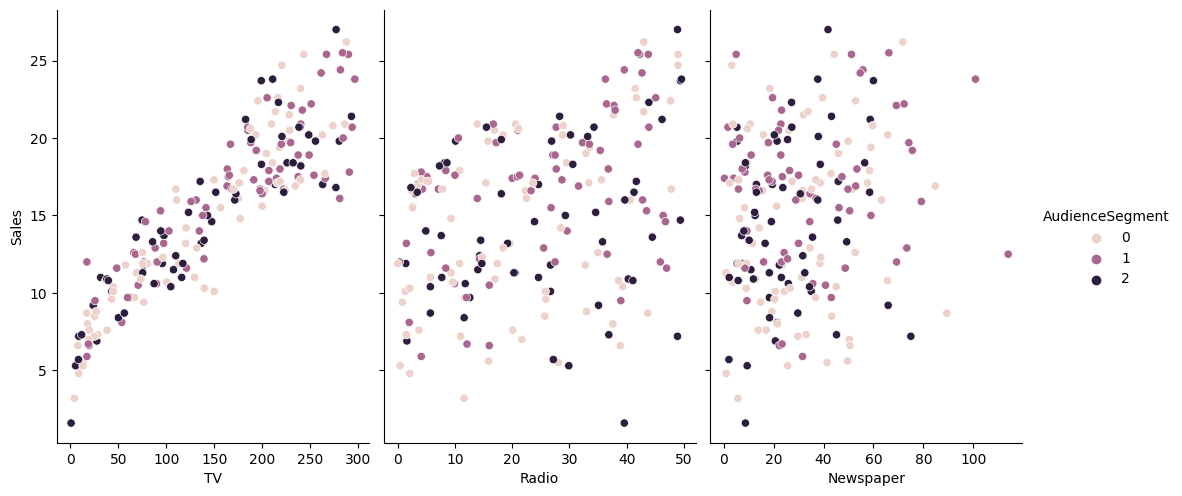

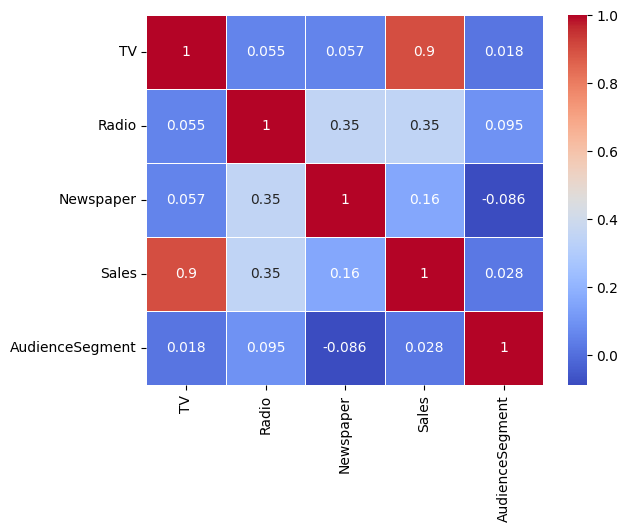

In [30]:
# Visualize the relationships between advertising channels (TV, Radio, Newspaper) and sales.
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', hue='AudienceSegment', height=5, aspect=0.7, kind='scatter')
plt.show()

# Calculate and visualize the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


Step 4: Feature Sleection & Data Splitting

In [31]:
# Define features (X) and target variable (y)
selected_features = ['TV', 'Radio', 'Newspaper', 'AudienceSegment']
X = data[selected_features]
y = data['Sales']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Step 5: Model Selection, Training & Evaluation

In [33]:
# Model Selection (e.g., RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model from hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Model Evaluation on Test Data
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Cross-Validation RMSE: {cv_rmse_scores.mean()}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (MSE): 1.4865192167516195
R-squared (R2): 0.9518942944829919
Cross-Validation RMSE: 1.2716114821510527


Step 6: Make Sales Predictions for New Data

In [35]:
# Create a new data point with features for prediction
new_data = pd.DataFrame({'TV': [100], 'Radio': [25], 'Newspaper': [10], 'AudienceSegment': ['SegmentA']})

# Encode categorical variable AudienceSegment
new_data['AudienceSegment'] = encoder.transform(new_data['AudienceSegment'])

# Standardize numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
new_data_scaled = scaler.transform(new_data[selected_features])

# Predict sales for the new data point
predicted_sales = best_rf_model.predict(new_data_scaled)
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 3.2839999999999994
